Packages

In [1]:
import pandas as pd

Dataset importing

In [2]:
data = pd.read_csv("Telco-Customer-Churn.csv")

# Process One:

a. Number of rows and columns:

In [3]:
data.shape

(7045, 21)

b. Statistic description of the features:

In [4]:
data.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7045,7045,7045.000000,7045,7045,7045.000000,7045,7045,7045,7045,...,7045,7045,7045,7045,7045,7045,7045,7045.000000,7034.000000,7045
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,5575-GNVDE,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,2,3557,NaN,3643,4935,NaN,6363,3392,3096,3498,...,3096,3475,2812,2787,3876,4172,2365,NaN,NaN,5175
mean,NaN,NaN,0.162101,NaN,NaN,32.365507,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.759035,2282.935222,NaN
std,NaN,NaN,0.368569,NaN,NaN,24.561012,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.086200,2266.602273,NaN
min,NaN,NaN,0.000000,NaN,NaN,-10.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.350000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3793.775000,NaN


# Process Two:

a. Duplications:

In [5]:
sum(data.duplicated())

2

Remove duplications values:

In [6]:
data = data.drop_duplicates(keep='first')
sum(data.duplicated())

0

b. Incorrect values:

In [7]:
data["tenure"].min()

-10

Replace incorrect values with zero:

In [8]:
data["tenure"] = data["tenure"].replace([-10],0)
data["tenure"].min()

0

c. Missing values:

In [9]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Replace null values with the mean:

In [10]:
TotalChargesMean = data["TotalCharges"].mean()
data["TotalCharges"] = data["TotalCharges"].fillna(TotalChargesMean)
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Process Three:

a. Dropping irrelevant data customer ID:

In [11]:
data = data.drop(["customerID"], axis=1)

# Process Four:

a. The percentage for each gender which left the company, and whether it has an effect on churn:

In [12]:
male = len(data[(data["gender"] == "Male") & (data["Churn"] == "Yes")])
totalMale = len(data[(data["gender"] == "Male")])
print ("The percentage of the males who left the company: ", "%.2f" % round((male/totalMale*100),2) , "%")

female = len(data[(data["gender"] == "Female") & (data["Churn"] == "Yes")])
totalFemale = len(data[(data["gender"] == "Female")])
print ("The percentage of the females who left the company: ", "%.2f" % round((female/totalFemale*100),2) , "%")

The percentage of the males who left the company:  26.16 %
The percentage of the females who left the company:  26.92 %


Chart:

<AxesSubplot: title={'center': 'Gender and churn bar chart'}, xlabel='gender'>

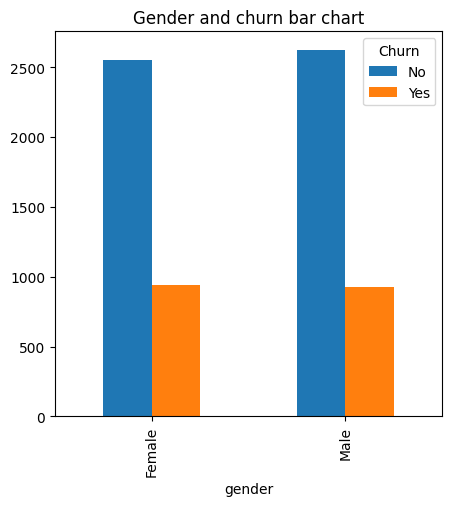

In [13]:
genderChurn = data.groupby(['gender','Churn'])
genderChurn.size().unstack().plot(kind='bar', figsize=(5,5), title = 'Gender and churn bar chart')

b. The percentage of elderly people who left the company, and whether it has an effect on churn:

In [14]:
elderly = len(data[(data["SeniorCitizen"] == 1) & (data["Churn"] == "Yes")])
totalElderly = len(data[(data["SeniorCitizen"] == 1)])
print ("The percentage of elderly people who left the company: ", "%.2f" % round((elderly/totalElderly*100),2) , "%")

The percentage of elderly people who left the company:  41.68 %


Chart:

<AxesSubplot: title={'center': 'Senior citizen and churn bar chart'}, xlabel='SeniorCitizen'>

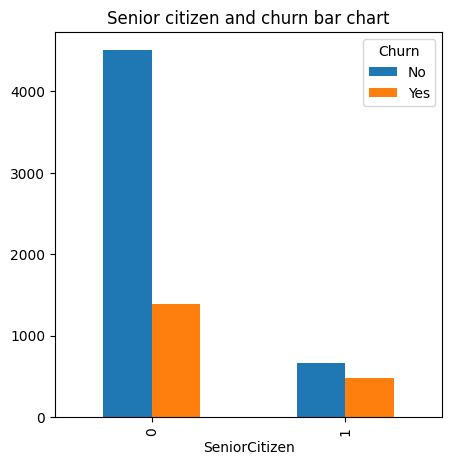

In [15]:
seniorCitizenChurn = data.groupby(['SeniorCitizen','Churn'])
seniorCitizenChurn.size().unstack().plot(kind='bar', figsize=(5,5), title = 'Senior citizen and churn bar chart')

c. The effect of contract type on churn:

Chart:

<AxesSubplot: title={'center': 'Contract and churn bar chart'}, xlabel='Contract'>

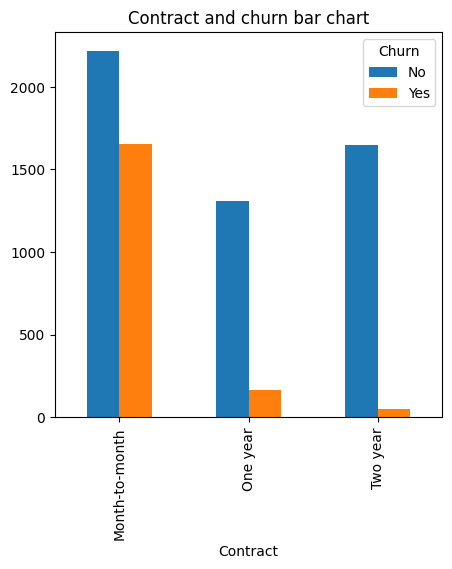

In [16]:
contractChurn = data.groupby(['Contract','Churn'])
contractChurn.size().unstack().plot(kind='bar', figsize=(5,5), title = 'Contract and churn bar chart')

Saving the new dataset 

In [17]:
data.to_csv('New-Telco-Customer-Churn.csv', index=False, encoding='utf-8')